In [164]:
import pandas as pd
import os
import numpy as np
import time
import tensorflow.keras.initializers
import statistics
import tensorflow.keras as keras
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, InputLayer
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import ShuffleSplit
from tensorflow.keras.layers import ReLU
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [165]:
# Data directly taken from PDF
Ebins = np.array([1.00E-03,2.15E-03,4.64E-03,1.00E-02,2.15E-02,4.64E-02,1.00E-01,2.15E-01,4.64E-01,1.00E+00,2.15E+00,4.64E+00,1.00E+01,2.15E+01,4.64E+01,1.00E+02,2.15E+02,4.64E+02,1.00E+03,2.15E+03,4.64E+03,1.00E+04,1.25E+04,1.58E+04,1.99E+04,2.51E+04,3.16E+04,3.98E+04,5.01E+04,6.30E+04,7.94E+04,1.00E+05,1.25E+05,1.58E+05,1.99E+05,2.51E+05,3.16E+05,3.98E+05,5.01E+05,6.30E+05,7.94E+05,1.00E+06,1.25E+06,1.58E+06,1.99E+06,2.51E+06,3.16E+06,3.98E+06,5.01E+06,6.30E+06,7.94E+06,1.00E+07,1.58E+07])

cm = np.array([
[6.11E+00,5.60E+00,4.80E+00,3.89E+00,3.03E+00,2.27E+00,1.64E+00,1.17E+00,8.20E-01,5.72E-01,3.94E-01,2.73E-01,1.90E-01,1.28E-01,8.88E-02,6.02E-02,4.05E-02,2.79E-02,1.91E-02,1.27E-02,9.01E-03,6.86E-03,6.24E-03,5.62E-03,4.99E-03,4.37E-03,3.83E-03,3.36E-03,2.90E-03,2.43E-03,1.97E-03,1.64E-03,1.47E-03,1.31E-03,1.15E-03,9.96E-04,8.95E-04,8.61E-04,8.28E-04,7.94E-04,7.60E-04,7.22E-04,6.79E-04,6.37E-04,5.94E-04,5.51E-04,4.94E-04,4.19E-04,3.44E-04,2.70E-04,1.97E-04,1.39E-04,1.00E-04],
[7.36E-01,8.08E-01,9.34E-01,1.12E+00,1.36E+00,1.72E+00,2.11E+00,2.38E+00,2.47E+00,2.46E+00,2.37E+00,2.24E+00,2.04E+00,1.85E+00,1.65E+00,1.47E+00,1.30E+00,1.14E+00,1.01E+00,8.83E-01,7.64E-01,6.98E-01,6.69E-01,6.39E-01,6.09E-01,5.81E-01,5.54E-01,5.26E-01,4.99E-01,4.71E-01,4.41E-01,4.09E-01,3.77E-01,3.45E-01,3.13E-01,2.81E-01,2.49E-01,2.17E-01,1.87E-01,1.59E-01,1.34E-01,1.11E-01,9.38E-02,7.58E-02,5.80E-02,4.42E-02,3.52E-02,2.63E-02,1.95E-02,1.52E-02,1.10E-02,7.43E-03,4.65E-03],
[5.98E-01,6.57E-01,7.58E-01,9.00E-01,1.08E+00,1.42E+00,1.89E+00,2.27E+00,2.51E+00,2.65E+00,2.69E+00,2.67E+00,2.58E+00,2.45E+00,2.29E+00,2.14E+00,1.98E+00,1.83E+00,1.67E+00,1.53E+00,1.39E+00,1.31E+00,1.27E+00,1.23E+00,1.20E+00,1.16E+00,1.13E+00,1.09E+00,1.05E+00,1.02E+00,9.77E-01,9.33E-01,8.87E-01,8.35E-01,7.78E-01,7.19E-01,6.57E-01,5.94E-01,5.27E-01,4.61E-01,3.96E-01,3.39E-01,2.90E-01,2.42E-01,1.94E-01,1.54E-01,1.24E-01,9.54E-02,7.21E-02,5.66E-02,4.15E-02,2.81E-02,1.77E-02],
[5.01E-01,5.50E-01,6.34E-01,7.50E-01,9.18E-01,1.22E+00,1.62E+00,2.00E+00,2.31E+00,2.52E+00,2.66E+00,2.75E+00,2.75E+00,2.71E+00,2.63E+00,2.53E+00,2.41E+00,2.30E+00,2.18E+00,2.04E+00,1.92E+00,1.84E+00,1.81E+00,1.78E+00,1.74E+00,1.71E+00,1.67E+00,1.64E+00,1.61E+00,1.57E+00,1.53E+00,1.49E+00,1.44E+00,1.38E+00,1.32E+00,1.25E+00,1.17E+00,1.09E+00,9.97E-01,8.96E-01,7.96E-01,6.97E-01,6.02E-01,5.13E-01,4.24E-01,3.47E-01,2.85E-01,2.24E-01,1.77E-01,1.49E-01,1.21E-01,7.95E-02,4.26E-02],
[4.15E-01,4.55E-01,5.24E-01,6.18E-01,7.61E-01,1.01E+00,1.36E+00,1.72E+00,2.04E+00,2.27E+00,2.45E+00,2.58E+00,2.64E+00,2.67E+00,2.66E+00,2.63E+00,2.58E+00,2.51E+00,2.43E+00,2.35E+00,2.26E+00,2.21E+00,2.18E+00,2.15E+00,2.13E+00,2.10E+00,2.08E+00,2.06E+00,2.04E+00,2.02E+00,1.99E+00,1.95E+00,1.92E+00,1.88E+00,1.83E+00,1.77E+00,1.70E+00,1.61E+00,1.51E+00,1.38E+00,1.26E+00,1.13E+00,1.00E+00,8.67E-01,7.33E-01,6.13E-01,5.10E-01,4.08E-01,3.30E-01,2.80E-01,2.30E-01,1.55E-01,8.39E-02],
[3.43E-01,3.75E-01,4.31E-01,5.11E-01,6.31E-01,8.34E-01,1.12E+00,1.43E+00,1.72E+00,1.95E+00,2.13E+00,2.29E+00,2.39E+00,2.46E+00,2.50E+00,2.51E+00,2.52E+00,2.52E+00,2.47E+00,2.44E+00,2.39E+00,2.36E+00,2.35E+00,2.34E+00,2.33E+00,2.32E+00,2.31E+00,2.31E+00,2.30E+00,2.29E+00,2.28E+00,2.27E+00,2.26E+00,2.24E+00,2.22E+00,2.19E+00,2.13E+00,2.07E+00,1.97E+00,1.86E+00,1.73E+00,1.59E+00,1.42E+00,1.25E+00,1.08E+00,9.20E-01,7.60E-01,6.27E-01,5.14E-01,4.09E-01,3.03E-01,2.25E-01,1.40E-01],
[2.80E-01,3.07E-01,3.53E-01,4.23E-01,5.13E-01,6.91E-01,9.32E-01,1.18E+00,1.41E+00,1.62E+00,1.81E+00,1.95E+00,2.07E+00,2.18E+00,2.24E+00,2.29E+00,2.32E+00,2.34E+00,2.36E+00,2.36E+00,2.33E+00,2.33E+00,2.33E+00,2.33E+00,2.34E+00,2.34E+00,2.35E+00,2.37E+00,2.38E+00,2.39E+00,2.41E+00,2.43E+00,2.44E+00,2.46E+00,2.47E+00,2.47E+00,2.44E+00,2.40E+00,2.33E+00,2.23E+00,2.10E+00,1.98E+00,1.82E+00,1.63E+00,1.45E+00,1.26E+00,1.07E+00,8.88E-01,7.36E-01,6.29E-01,5.22E-01,3.61E-01,2.04E-01],
[1.85E-01,2.05E-01,2.34E-01,2.79E-01,3.42E-01,4.57E-01,6.16E-01,7.74E-01,9.38E-01,1.08E+00,1.22E+00,1.34E+00,1.44E+00,1.52E+00,1.61E+00,1.69E+00,1.74E+00,1.80E+00,1.87E+00,1.90E+00,1.92E+00,1.96E+00,1.98E+00,2.00E+00,2.02E+00,2.05E+00,2.08E+00,2.12E+00,2.16E+00,2.20E+00,2.25E+00,2.31E+00,2.37E+00,2.43E+00,2.50E+00,2.57E+00,2.62E+00,2.66E+00,2.68E+00,2.67E+00,2.61E+00,2.53E+00,2.42E+00,2.25E+00,2.06E+00,1.82E+00,1.57E+00,1.36E+00,1.16E+00,9.63E-01,7.98E-01,5.95E-01,3.53E-01],
[1.18E-01,1.30E-01,1.52E-01,1.79E-01,2.13E-01,2.91E-01,3.95E-01,5.07E-01,6.09E-01,7.04E-01,7.92E-01,8.66E-01,9.43E-01,1.02E+00,1.08E+00,1.14E+00,1.20E+00,1.25E+00,1.31E+00,1.37E+00,1.42E+00,1.46E+00,1.48E+00,1.50E+00,1.53E+00,1.55E+00,1.58E+00,1.62E+00,1.67E+00,1.73E+00,1.80E+00,1.87E+00,1.95E+00,2.05E+00,2.15E+00,2.27E+00,2.41E+00,2.52E+00,2.59E+00,2.65E+00,2.70E+00,2.71E+00,2.67E+00,2.58E+00,2.44E+00,2.25E+00,2.02E+00,1.78E+00,1.55E+00,1.31E+00,1.07E+00,8.07E-01,5.25E-01],
[7.19E-02,8.04E-02,9.38E-02,1.13E-01,1.40E-01,1.84E-01,2.52E-01,3.21E-01,3.84E-01,4.42E-01,5.04E-01,5.58E-01,6.06E-01,6.49E-01,6.77E-01,7.23E-01,7.85E-01,8.28E-01,8.73E-01,9.13E-01,9.47E-01,9.90E-01,1.01E+00,1.04E+00,1.06E+00,1.08E+00,1.12E+00,1.16E+00,1.21E+00,1.25E+00,1.32E+00,1.38E+00,1.46E+00,1.56E+00,1.68E+00,1.80E+00,1.95E+00,2.08E+00,2.22E+00,2.35E+00,2.47E+00,2.57E+00,2.65E+00,2.64E+00,2.54E+00,2.38E+00,2.16E+00,2.01E+00,1.87E+00,1.62E+00,1.31E+00,1.02E+00,6.80E-01],
[3.63E-02,4.04E-02,4.84E-02,5.66E-02,6.52E-02,8.84E-02,1.21E-01,1.55E-01,1.90E-01,2.19E-01,2.43E-01,2.75E-01,2.99E-01,3.16E-01,3.39E-01,3.64E-01,3.90E-01,4.13E-01,4.36E-01,4.68E-01,5.00E-01,5.23E-01,5.34E-01,5.45E-01,5.56E-01,5.70E-01,5.91E-01,6.15E-01,6.37E-01,6.64E-01,7.03E-01,7.52E-01,8.14E-01,8.93E-01,9.84E-01,1.08E+00,1.21E+00,1.35E+00,1.52E+00,1.69E+00,1.88E+00,2.06E+00,2.22E+00,2.35E+00,2.41E+00,2.36E+00,2.22E+00,2.13E+00,2.03E+00,1.80E+00,1.56E+00,1.24E+00,8.69E-01],
[2.72E-02,3.05E-02,3.71E-02,4.49E-02,5.41E-02,6.96E-02,9.36E-02,1.26E-01,1.48E-01,1.70E-01,1.92E-01,2.18E-01,2.33E-01,2.37E-01,2.65E-01,2.89E-01,3.08E-01,3.26E-01,3.46E-01,3.70E-01,3.83E-01,4.06E-01,4.22E-01,4.38E-01,4.53E-01,4.69E-01,4.83E-01,4.97E-01,5.10E-01,5.29E-01,5.61E-01,6.09E-01,6.70E-01,7.43E-01,8.24E-01,9.19E-01,1.03E+00,1.14E+00,1.29E+00,1.46E+00,1.66E+00,1.85E+00,2.02E+00,2.19E+00,2.30E+00,2.29E+00,2.18E+00,2.10E+00,2.03E+00,1.82E+00,1.60E+00,1.31E+00,9.15E-01],
[1.05E-02,1.11E-02,1.29E-02,1.55E-02,1.94E-02,2.79E-02,3.72E-02,4.61E-02,5.23E-02,5.95E-02,7.00E-02,7.80E-02,8.42E-02,8.85E-02,9.14E-02,1.01E-01,1.17E-01,1.20E-01,1.28E-01,1.34E-01,1.43E-01,1.46E-01,1.54E-01,1.62E-01,1.66E-01,1.65E-01,1.67E-01,1.73E-01,1.87E-01,2.06E-01,2.26E-01,2.40E-01,2.54E-01,2.84E-01,3.25E-01,3.79E-01,4.50E-01,5.37E-01,6.52E-01,7.77E-01,9.34E-01,1.12E+00,1.32E+00,1.51E+00,1.68E+00,1.77E+00,1.77E+00,1.88E+00,1.98E+00,1.89E+00,1.68E+00,1.43E+00,1.05E+00],
[1.65E-03,2.14E-03,2.62E-03,3.40E-03,4.49E-03,5.06E-03,6.08E-03,8.28E-03,1.04E-02,1.26E-02,1.46E-02,1.60E-02,1.70E-02,1.80E-02,2.01E-02,2.21E-02,2.39E-02,2.40E-02,2.27E-02,2.46E-02,2.65E-02,2.94E-02,3.12E-02,3.30E-02,3.48E-02,3.63E-02,3.72E-02,3.78E-02,3.84E-02,4.01E-02,4.48E-02,5.09E-02,5.71E-02,6.37E-02,7.14E-02,8.52E-02,1.06E-01,1.32E-01,1.73E-01,2.28E-01,3.12E-01,4.31E-01,5.70E-01,7.23E-01,8.93E-01,1.03E+00,1.11E+00,1.31E+00,1.55E+00,1.59E+00,1.52E+00,1.40E+00,1.09E+00],
[4.83E-04,4.94E-04,5.05E-04,6.48E-04,9.25E-04,1.11E-03,1.21E-03,1.33E-03,1.45E-03,1.63E-03,1.87E-03,2.12E-03,3.00E-03,4.46E-03,4.11E-03,3.78E-03,3.54E-03,3.66E-03,4.27E-03,4.84E-03,5.42E-03,6.01E-03,6.35E-03,6.69E-03,7.03E-03,7.31E-03,7.49E-03,7.62E-03,7.76E-03,7.97E-03,8.39E-03,9.16E-03,1.03E-02,1.20E-02,1.42E-02,1.83E-02,2.47E-02,3.10E-02,4.07E-02,5.80E-02,8.93E-02,1.39E-01,2.08E-01,3.07E-01,4.30E-01,5.79E-01,7.51E-01,9.22E-01,1.10E+00,1.22E+00,1.25E+00,1.22E+00,1.08E+00]])

# For Using Bayesian Optimization on Various Types of Data

In [197]:
def getModel(numNeurons0, numNeurons1, numNeurons2, dropout):
    
    numNeurons0 = int(numNeurons0)
    numNeurons1 = int(numNeurons1)
    numNeurons2 = int(numNeurons2)
 
    model = keras.Sequential()
    
    model.add(keras.Input(15))
    
    if numNeurons0 >= 1:
        model.add(Dropout(dropout))
        model.add(Dense(numNeurons0, activation='relu'))
    if numNeurons1 >= 1:
        model.add(Dropout(dropout))
        model.add(Dense(numNeurons1, activation='relu'))
    if numNeurons2 >= 1:
        model.add(Dropout(dropout))
        model.add(Dense(numNeurons2, activation='relu'))
   
    model.add(Dense(53, activation='linear'))
    
    return model


def getMeanError(numNeurons0, numNeurons1, numNeurons2, dropout, lr, dataSource, validationSource = None):
    
    x,y = dataSource()
    
    # Rescales the data using minmax scaler
    xscaler = MinMaxScaler()
    xscaler.fit(x)
    x = xscaler.transform(x)
    
    yscaler = MinMaxScaler()
    yscaler.fit(y)
    y = yscaler.transform(y)
    
    # Splits the data into 3 folds for bootstrapping
    SPLITS = 2
    boot = ShuffleSplit(n_splits = SPLITS, test_size=0.1, random_state=42)
    
    # Track the progress
    benchmarks = []
    epochs_needed = []
    num = 0
    
    # Bootstrap the data for mean error
    for train, test in boot.split(x):
                
        # Compile model
        model = getModel(numNeurons0, numNeurons1, numNeurons2, dropout)
        model.compile(loss = "mse", optimizer = Adam(lr=lr) )
        
        # Sets up early stopping
        monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, 
                                patience=20, verbose=0,
                                mode='min', restore_best_weights=True)
        
        if validationSource == None:
            # Split test and train data
            xtrain = x[train]
            xtest = x[test]

            ytrain = y[train]
            ytest = y[test]
        
        else:
            xtrain = x
            ytrain = y
            
            xtest, ytest = validationSource()
            xtest, ytest = xscaler.transform(xtest), yscaler.transform(ytest)
            
            
        # Fits to the bootstrap data
        model.fit(xtrain,ytrain,validation_data=(xtest,ytest),batch_size=32,callbacks=[monitor],verbose=0,epochs=10000)

        # Gets the epochs needed to converge
        epochs_needed.append(monitor.stopped_epoch)
        
        # Checks how well the test data was fit
        ypred = model(xtest)
        score = metrics.mean_squared_error(yscaler.inverse_transform(ytest), yscaler.inverse_transform(ypred))
        benchmarks.append(score)
        
    mean_benchmark = np.mean(benchmarks)
    mean_epochs = np.mean(epochs_needed)
    
    print("Score : " , mean_benchmark , " Epochs Needed : " , mean_epochs)
    return -mean_benchmark
        

# Methods for Getting Various Data

In [198]:
# Loads the real-world data from IAS tecdoc
def loadXY():

    '''
    Can't figure out how to pass non-optimiziable variable to the bayes opt
    module. Just load them from pickle everytime in evaluate_network()
    '''
    unfolding_data = pd.read_pickle("data/unfolding_data.pkl")

    X = np.zeros((251,15))
    Y = np.zeros((251,53))
    for row in range(251):
    
        X[row,:] = unfolding_data['Detector Response'][row]
        Y[row,:] = unfolding_data['Spectrum'][row][0:53]
    
    return X,Y

# Uses the detector response matrix to generate monoenergetic data, 
# and all possible convolutions of two monoenergetic data
def loadConvolutedMonoData():
    
    # All of the neutron spectra are multiplied by fluences
    fluences = np.zeros(53)
    for i in range(53):
        temp = np.append(Ebins, [2.51E+07])
        fluences[i] = np.log(temp[i + 1]) - np.log(temp[i])
        
    x = np.zeros( (0, 15) )
    y = np.zeros( (0, 53) )
    
    # Get all mono-energetic and double-energetic data
    for _ in range(4):
        for i in range(53):
            for j in range(53):
                yRow = np.zeros(53)

                prop = np.random.random()
                yRow[i] += prop
                yRow[j] += 1.0 - prop

                xRow = np.matmul(cm, yRow)
                yRow = yRow / fluences

                x = np.vstack( (x, xRow) )
                y = np.vstack( (y, yRow) )    
    
    return x,y

# Gets 100 Random Triple Convoluted Energy Sources
def loadTripleConvData():
    
    # All of the neutron spectra are multiplied by fluences
    fluences = np.zeros(53)
    for i in range(53):
        temp = np.append(Ebins, [2.51E+07])
        fluences[i] = np.log(temp[i + 1]) - np.log(temp[i])
        
    x = np.zeros( (0, 15) )
    y = np.zeros( (0, 53) )
    
    for _ in range(200):
        i = np.random.randint(low = 0, high = 53)
        
        j = i
        while j == i:
            j = np.random.randint(low = 0, high = 53)
            
        k = i
        while k == i or k == j:
            k = np.random.randint(low = 0, high = 53)
        
        yRow = np.zeros(53)
        yRow[i] += 1.0 / 3.0
        yRow[j] += 1.0 / 3.0
        yRow[k] += 1.0 / 3.0
            
        xRow = np.matmul(cm, yRow)
        yRow = yRow / fluences

        x = np.vstack( (x, xRow) )
        y = np.vstack( (y, yRow) )
    
    return x,y

# Training NN on Mono-Energetic Data

In [195]:
# Optimizes the Neural Network using convoluted monoenergetic data, to simulate
# the monoenergetic data of the Geant4 Simulations

pbounds = { "numNeurons0" : (0, 400),
            "numNeurons1" : (0, 400),
            "numNeurons2" : (0, 400),
            "dropout"     : (0, 0.3),
            "lr"          : (0, 0.1) }

def convolutedMonoData(numNeurons0, numNeurons1, numNeurons2, dropout, lr): 
    return getMeanError(numNeurons0, numNeurons1, numNeurons2, dropout, lr, loadConvolutedMonoData, loadTripleConvData)

optimizer = BayesianOptimization(
    f=convolutedMonoData,
    pbounds=pbounds,
    verbose=2,
    random_state=1
)

optimizer.maximize(init_points=40, n_iter=80)

print("Best Value : " , optimizer.max)

|   iter    |  target   |  dropout  |    lr     | numNeu... | numNeu... | numNeu... |
-------------------------------------------------------------------------------------
Score :  0.0716944944797753  Epochs Needed :  20.5
|  1        | -0.07169  |  0.1251   |  0.07203  |  0.04575  |  120.9    |  58.7     |
Score :  0.06683403592218187  Epochs Needed :  52.5
|  2        | -0.06683  |  0.0277   |  0.01863  |  138.2    |  158.7    |  215.5    |
Score :  0.07132491394830183  Epochs Needed :  23.0
|  3        | -0.07132  |  0.1258   |  0.06852  |  81.78    |  351.2    |  10.96    |
Score :  0.0707548586515674  Epochs Needed :  28.0
|  4        | -0.07075  |  0.2011   |  0.04173  |  223.5    |  56.15    |  79.24    |
Score :  0.07038905531984685  Epochs Needed :  24.5
|  5        | -0.07039  |  0.2402   |  0.09683  |  125.4    |  276.9    |  350.6    |
Score :  0.06613717831829044  Epochs Needed :  21.5
|  6        | -0.06614  |  0.2684   |  0.008504 |  15.62    |  67.93    |  351.3    |
Sc

KeyboardInterrupt: 

In [199]:
Best = {'dropout': 0.005964040151938676, 
        'lr': 0.002621098687771928, 
        'numNeurons0': 11.322595208317843, 
        'numNeurons1': 98.48442704121835, 
        'numNeurons2': 344.0111794731552}

modelCONV = getModel(Best["numNeurons0"], Best["numNeurons1"], Best["numNeurons2"], Best["dropout"])
modelCONV.compile(loss = "mse", optimizer = Adam(lr=Best["lr"]) )
        
# Sets up early stopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, 
                        patience=500, verbose=0,
                        mode='min', restore_best_weights=True)
 
# Gets the data to train on
x, y = loadConvolutedMonoData()

# Rescales the data using minmax scaler
xscalerCONV = MinMaxScaler()
xscalerCONV.fit(x)
x = xscalerCONV.transform(x)
    
yscalerCONV = MinMaxScaler()
yscalerCONV.fit(y)
y = yscalerCONV.transform(y)

# Gets More Complex data to Validate On
xVal, yVal = loadTripleConvData()
xVal, yVal = xscalerCONV.transform(xVal), yscalerCONV.transform(yVal)

# Fits to the data
modelCONV.fit(x, y, validation_data = (xVal, yVal), batch_size = 32, callbacks=[monitor], verbose=0, epochs=10000)

In [200]:
# Now gets real-world data to test accuracy of a model trained on this sort of data
x, y = loadXY()
x, y = x[0:15], y[0:15]

x = xscalerCONV.transform(x)
yPredCONV = yscalerCONV.inverse_transform( modelCONV(x) )

print( np.mean( (yPredCONV - y)**2 ) )

0.008904464101350719


# Comparing to Trained NN on Actual Data

In [201]:
# Now performs optimization using the actual real-world data

pbounds = { "numNeurons0" : (50, 300),
            "numNeurons1" : (50, 300),
            "numNeurons2" : (50, 300),
            "dropout"     : (0, 0.1),
            "lr"          : (0, 0.1) }

realData = lambda numNeurons0, numNeurons1, numNeurons2, dropout, lr : getMeanError(numNeurons0, numNeurons1, numNeurons2, dropout, lr, loadXY)

optimizer = BayesianOptimization(
    f=realData,
    pbounds=pbounds,
    verbose=2,
    random_state=1
)

optimizer.maximize(init_points=20, n_iter=60)

print("Best Value : " , optimizer.max)

|   iter    |  target   |  dropout  |    lr     | numNeu... | numNeu... | numNeu... |
-------------------------------------------------------------------------------------


KeyboardInterrupt: 

In [202]:
Best = {'dropout': 0.02350039786459355, 
        'lr': 0.0022225815331050726, 
        'numNeurons0': 50.20681409217918, 
        'numNeurons1': 290.1327806569285, 
        'numNeurons2': 57.02757236396956 }

model = getModel(Best["numNeurons0"], Best["numNeurons1"], Best["numNeurons2"], Best["dropout"])
model.compile(loss = "mse", optimizer = Adam(lr=Best["lr"]) )
        
# Sets up early stopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, 
                        patience=500, verbose=0,
                        mode='min', restore_best_weights=True)
 
# Gets the data to train on
x, y = loadXY()

xVal, yVal = x[0:15], y[0:15]
x, y = x[15:], y[15:]

# Rescales the data using minmax scaler
xscaler = MinMaxScaler()
xscaler.fit(x)
x = xscaler.transform(x)
xVal = xscaler.transform(xVal)
    
yscaler = MinMaxScaler()
yscaler.fit(y)
y = yscaler.transform(y)
yVal = yscaler.transform(yVal)

# Fits to the data
model.fit(x, y, validation_data = (xVal, yVal), callbacks=[monitor], batch_size = 32, verbose=0, epochs=10000)

In [203]:
# Now gets real-world data to test accuracy of a model trained on this sort of data
x, y = loadXY()
x, y = x[0:15], y[0:15]

x = xscaler.transform(x)
yPred = yscaler.inverse_transform( model(x) )

print( np.mean( (yPred - y)**2 ) )

0.0009942154022260124


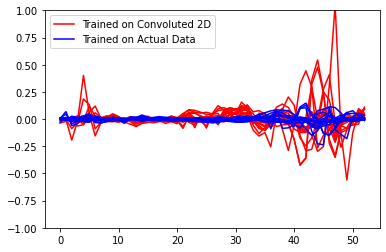

In [204]:
plt.plot([], color="red", label="Trained on Convoluted 2D")
for i in range(len(yPred)):  
    plt.plot(yPredCONV[i] - y[i], color="red")
    
plt.plot([], color="blue", label="Trained on Actual Data")
for i in range(len(yPred)):  
    plt.plot(yPred[i] - y[i], color="blue")

plt.ylim(-1,1)
plt.legend()